## $\color{red}{\text{Lecture Overview}}$
1. **Classification Techniques**
2. **Decision Trees and Random Forests**
2. **Developing the Analytic Task**
3. **Data Transformation**
4. **Data Modeling**
5. **Model Comparison**

## $\color{red}{\text{Decision Trees}}$

### $\color{blue}{\text{An Intuition}}$
1. Separate observations into "purer" subgroups by splitting on variables
2. The splits create logical rules for prediction
    - Example: **IF (Age < 55 AND Education > 12) THEN (class = 1)**
3. The resulting subgroups should be more homogeneous in terms of the outcome variable
4. Advantage: DTs are transparent and easy to interpret

### $\color{blue}{\text{Tree Structure}}$
1. Each rectangle is called a **node**. There are two types of nodes
    - **Decision** and **terminal / leaf** nodes
2. The left leaf node represent observations that meet the splitting condition (“True”)
3. The right leaf node represent observations that does not meet the splitting condition (“False”)
4. Each node contains the following information:
    - The name of the variable chosen for splitting and its value
    - The number of observations (samples) in that node
    - The distribution of the classes
    - The majority class of that node
5. The color of the node shows how "pure" the samples are for classification\

### $\color{blue}{\text{Tree Example}}$

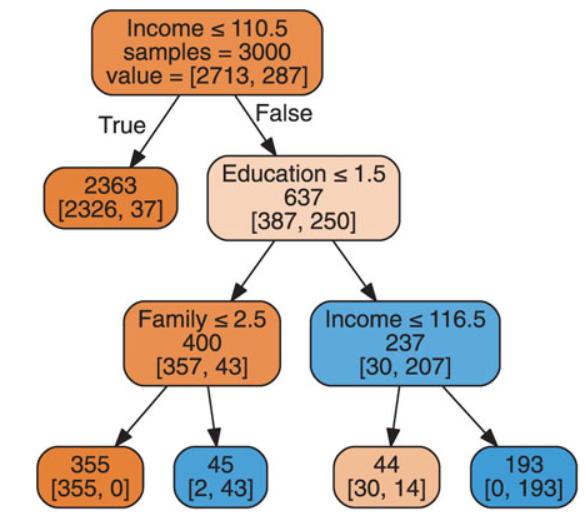

### $\color{blue}{\text{Splitting On a Variable}}$
1. Split on a variable that produces "purer" samples
2. Two popular measures of purity/ impurity
    - Gini index
    - Enthropy measure

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

## $\color{red}{\text{Import Data}}$

In [2]:
bank_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/UniversalBank.csv')

## $\color{red}{\text{Analytic Task}}$
1. Using the bank_df data, build a **Decision Tree model** to predict **Personal Loan**
2. Perform data transformation methods wherever needed
3. Perform data visualization tasks to develop a preliminary understanding of **Personal Loan**
4. Develop a model to predict **Personal Loan**
5. Assess the robustness of the model
6. Interpret the model for insights
7. **Model Comparison**

## $\color{red}{\text{Data Transformation}}$

### $\color{blue}{\text{Deletion and Replacing}}$
1. Identify and remove ID and other variables that does not contribute to the models
2. Fix spaces in variable names
    - If a column name has a space, replace the space with an underscore (_)
3. Check to see if the procedures worked

In [3]:
# Delete the ID and ZIP code columns
drop_vars = ['ID', 'ZIP Code']
bank_new = bank_df.drop(drop_vars, axis=1)

# Replace space with underscore in column names
bank_new.columns = bank_new.columns.str.replace(' ', '_')
# bank_new.head()

### $\color{blue}{\text{Recoding}}$

1. Change the **Education** variable to be type "category"
    - Some variables appear numeric but they are not
2. Rename the values (1,2,3) of the **Education** variable to the following:
    - 1 = Undergrad
    - 2 = Graduate
    - 3 = Professional
3. View the first five (5) observations of the data

In [4]:
# Change "Education" column as categorical
bank_new['Education'] = bank_new['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Professional"
categories = {1:'Undergrad', 2:'Graduate', 3:'Professional'}
bank_new['Education'] = bank_new.Education.cat.rename_categories(categories)

# First five observations
# bank_new.head()

### $\color{blue}{\text{Missing Value Analysis}}$

1. Check the extent to which variables have missing observations
2. If variables are missing, then imputation should be performed

In [5]:
# Function to compute missing values
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

# Using the function
percent_missing(bank_new).head()

Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
dtype: float64

### $\color{blue}{\text{Data Partitioning}}$

1. Identify dependent and independent variables
2. Partition the data such that 80% is used for training and 20% is used for testing

In [6]:
from sklearn.model_selection import train_test_split

# Independent variables to be used in the model
dep_variable = bank_new['Personal_Loan']
ind_variable = bank_new.drop('Personal_Loan', axis=1)

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(ind_variable, dep_variable, test_size=0.2, random_state=100)

### $\color{blue}{\text{Dummy Variables}}$
1. Replace categorical data with the mean of the dependent variable - rather than the standard dummy variable

In [9]:
# rather than getting 0s or 1s, get mean of dependent variable
#   This introduces variance into the dummies
from feature_engine.encoding import MeanEncoder
mean_enc = MeanEncoder().fit(train_X, train_y)

# Obtain new train and test data w/ categorical vars replaced with mean of dep variable
new_train = mean_enc.transform(train_X)
new_test = mean_enc.transform(test_X)

In [10]:
train_X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
4833,49,24,109,1,0.6,Undergrad,0,0,0,0,0
1218,62,36,98,2,2.8,Undergrad,0,0,0,0,0
135,58,33,45,4,2.1,Undergrad,0,0,0,1,1
3612,50,25,99,1,4.6,Undergrad,368,1,1,0,1
3259,33,8,54,3,2.3,Undergrad,0,0,0,0,1


In [11]:
new_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
4833,49,24,109,1,0.6,0.042169,0,0,0,0,0
1218,62,36,98,2,2.8,0.042169,0,0,0,0,0
135,58,33,45,4,2.1,0.042169,0,0,0,1,1
3612,50,25,99,1,4.6,0.042169,368,1,1,0,1
3259,33,8,54,3,2.3,0.042169,0,0,0,0,1


Look at the differences in the `Education` column. The corresponding dependent variable's average has been added to the column. This is the average of the 1 and 0's, and is an example of **feature engineering**. It creates a stronger relationship between the dependent and independent variable.

## $\color{red}{\text{Data Modeling}}$

### $\color{blue}{\text{Logistic Regression}}$

1. Fit a logistic regression model on the **training data**
2. Print the **intercept** and model **coefficients**


In [14]:
from sklearn.linear_model import LogisticRegression

# fit model
logit = LogisticRegression(solver='liblinear',random_state=0).fit(new_train, train_y)

If the logistic regression model fails to converge...

- Change the model (sklearn uses lbfgs as a default): LR.fit(**solver='liblinear' | 'newton-cg' | ...**)
- In this example, the model failed to converge with lbfgs, and replacing it with liblinear solved the issue.
    - Read into this more to get a better handle on which algorithm to replace lbfgs with, and add a few sentences why you picked the solver instead of lbfgs

### $\color{blue}{\text{Tree Based Models}}$

1. Fit a decision tree and random forest model to the training data

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=3).fit(new_train, train_y)
rf = RandomForestClassifier(random_state=0, n_estimators=5).fit(new_train, train_y)

To get better performance, choosing better and more hyperparameters can be chosen to increase performance (at the cost of training time)

### $\color{blue}{\text{Model Predictions}}$

1. Using the **testing data**, predict whether an individual will be approved for a **Personal_Loan**
  - This is prediction on unseen data

In [24]:
# LR Predictions
lr_pred = logit.predict(new_test)

# DT Predictions
dt_pred = dt.predict(new_test)

# RF Predictions
rf_pred = rf.predict(new_test)

## $\color{red}{\text{Model Diagnostics on Testing Data}}$

### $\color{blue}{\text{Accuracy and Misclassification Rate}}$
1. Provide the model's accuracy rate - what does it tell you?
2. Provide the model's misclassification rate - what does it tell you?

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy

lr_acc = accuracy_score(test_y, lr_pred)
dt_acc = accuracy_score(test_y, dt_pred)
rf_acc = accuracy_score(test_y, rf_pred)

print(f'The accuracy of the LR model is: {lr_acc}')
print(f'The accuracy of the DT model is: {dt_acc}')
print(f'The accuracy of the RF model is: {rf_acc}')

# Misclassification Rate

lr_mr = 1 - lr_acc
dt_mr = 1 - dt_acc
rf_mr = 1 - rf_acc

print(f'The misclassification rate of the LR model is: {lr_mr:.3f}')
print(f'The misclassification rate of the DT model is: {dt_mr:.3f}')
print(f'The misclassification rate of the RF model is: {rf_mr:.3f}')

The accuracy of the LR model is: 0.931
The accuracy of the DT model is: 0.983
The accuracy of the RF model is: 0.981
The misclassification rate of the LR model is: 0.069
The misclassification rate of the DT model is: 0.017
The misclassification rate of the RF model is: 0.019


Or in a tabular version...

In [36]:
print('************* Accuracy Rates *************')
print(f'LR model: {lr_acc}')
print(f'DT model: {dt_acc}')
print(f'RF model: {rf_acc}')

print('******** Misclassification Rates *********')
print(f'LR model: {lr_mr:.3f}')
print(f'DT model: {dt_mr:.3f}')
print(f'RF model: {rf_mr:.3f}')

************* Accuracy Rates *************
LR model: 0.931
DT model: 0.983
RF model: 0.981
******** Misclassification Rates *********
LR model: 0.069
DT model: 0.017
RF model: 0.019


Therefore, we should use the DT model, as it has the highest accuracy (and lowest misclassification rate)

### $\color{blue}{\text{ROC Curve}}$
1. Provide the ROC curve and comment on it

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot AUC (AREA UNDER CURVE) and ROC (RECEIVER OPERATING CHARACTERISTICS) curve
# AUC: Larger is better
# ROC: 

lr_auc = roc_auc_score(test_y, lr_pred)
dt_auc = roc_auc_score(test_y, dt_pred)
rf_auc = roc_auc_score(test_y, rf_pred)

In [42]:
# Now plot each ROC curve
# We need:
#   - TPR (True Positive Rate)
#   - FPR (False Positive Rate)
# These Come from the Confusion Matrix...

lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_pred)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_pred)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_pred)

In [ ]:
# You can also use the sklearn confusion matrix (i didnt get to finish this...)
from sklearn.metrics import confusion_matrix

lr_cm = confusion_matrix(test_y, lr_pred)
dt_cm = confusion_matrix(test_y, dt_pred)
rf_cm = confusion_matrix(test_y, rf_pred)

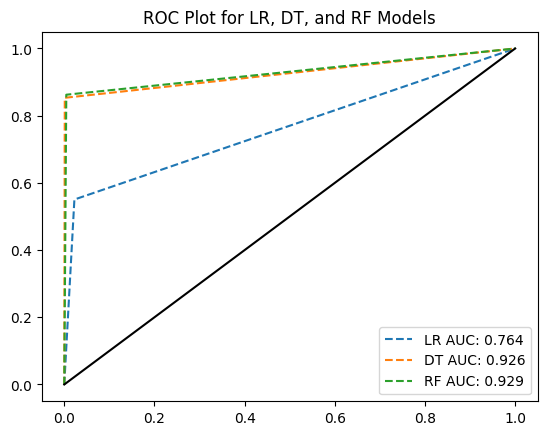

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label="{}{:.3f}".format("LR AUC: ", lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label="{}{:.3f}".format("DT AUC: ", dt_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label="{}{:.3f}".format("RF AUC: ", rf_auc))

# Plot 
plt.plot([0,1],[0,1], linestyle='solid',c='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Plot for LR, DT, and RF Models')
plt.legend()
plt.show()

### $\color{blue}{\text{Learning Curves}}$
1. Provides an indication of overfitting or underfitting
  - Key idea: Can the model "hold its own" on new data